# Notebook I - Climate Regime
<hr>
This module performs climate data analysis and compiling general agro-climatic indicators. These general agro-climatic indicators summarize climatic profiles in the study area for each grid. The key input data for this module is the climatic data, and the geographical and terrain data.

Prepared by Geoinformatics Center, AIT
<hr>


### Google drive connection
In this step, we will connect to Google Drive service and mount the drive where we will start our PyAEZ project

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Then, installing any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [ ]:
# 'Installing neccessary packages'
# !pip install gdal
# # !pip install pyaez==2.0.0


# K:\projects\unfao\pyaez_gaez\repos\PyAEZ_kerrie\PyAEZ\pyaez_v2.1_2023JUL10\NB1_ClimateRegime_v2_1_China.ipynb

In [1]:
import psutil
# psutil.virtual_memory()

psutil.virtual_memory().free/1E9

27.212156928

Now, we will import the specific Python packages we need for PyAEZ.

In [1]:
'''import supporting libraries'''
import numpy as np
import matplotlib.pyplot as plt
# import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

from time import time as timer

import xarray as xr
import rioxarray as rio

import dask.array as da
import dask

Setting the working directory -- where our PyAEZ project is located.

In [2]:
# branch version tag
revname='v21pv'

# # HPC Orion
# # Replace with path to your PyAEZ folder under your username
# work_dir = '/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/pyaez2.1_vectorize/'
# # Replace with whatever location you want to output data under your username
# out_path = '/work/hpc/users/kerrie/UN_FAO/pyaez_results/china_8110/'+revname+'/' 
# # these are the same for everyone on HPC Orion
# data_dir = '/work/hpc/datasets/un_fao/pyaez/china_8110/daily/npy/'
# maskfile = '/work/hpc/datasets/un_fao/pyaez/china_static/netcdf/mask.nc'
# elevfile = '/work/hpc/datasets/un_fao/pyaez/china_static/tif/elev.tif'


# # Kerrie desktop
work_dir = 'K:/projects/unfao/pyaez_gaez/repos/PyAEZ_kerrie/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
out_path = work_dir+'NB1outputs/' # path for saving output data
data_dir = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/npy/' # path to your data
maskfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/mask.tif'# subset for no antarctica, 1800 lats
elevfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_china_03272023/tif/elev.tif'

# work_dir = 'K:/projects/unfao/pyaez_gaez/repos/PyAEZ_kerrie/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/npy/' # path to your data
# maskfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/mask_2268708_5m.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie.WIN/Documents/data/pyAEZ_data_inputs_global_NOTPRODUCTION/tif/Elevation_2268708_5m.tif'


# # # Kerrie laptop china
# work_dir = 'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# # data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/npy/' # path to your data
# # maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/tif/mask.tif'# subset for no antarctica, 1800 lats
# # elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/china/tif/elev.tif'
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/5GB/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/5GB/mask.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/5GB/elev.tif'

# Kerrie laptop global
# work_dir = 'C://Users/kerrie/Documents/01_LocalCode/repos/PyAEZ/pyaez2.1_parvec/' # path to your PyAEZ repo
# out_path = work_dir+'NB1outputs/' # path for saving output data
# data_dir = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/npy/' # path to your data
# maskfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/tif/mask_2268708_5m.tif'# subset for no antarctica, 1800 lats
# elevfile = 'C://Users/kerrie/Documents/02_LocalData/pyAEZ_input_data/global_NOTPRODUCTION/tif/Elevation_2268708_5m.tif'

# Check whether the specified path exists or not
isExist = os.path.exists(out_path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(out_path)
   print("The new directory is created!")

<hr>

## MODULE 1: CLIMATE REGIME
Now, we will start executing the routines in Module 1


First, we initiate Module 1 Class instance by invoking the following commands:

In [3]:
# %load_ext autoreload
# %autoreload 2
# Import Module 1 and initate Class intance
# from pyaez import ClimateRegime
# clim_reg = ClimateRegime.ClimateRegime()

# # Importing UtilitiesCalc
# from pyaez import UtilitiesCalc
# obj_util = UtilitiesCalc.UtilitiesCalc()
sys.path.append(work_dir)
import ClimateRegime_v21pv as ClimateRegime
clim_reg = ClimateRegime.ClimateRegime()

import UtilitiesCalc_v21pv as UtilitiesCalc
obj_utilities=UtilitiesCalc.UtilitiesCalc()


### Importing the climate dataset and the geographical data/rasters.

The package expects six climate variables, as daily or monthly observations, as Numpy arrays.
Arrays must be 3-dimensional, with the third axes containing the time dimension.
Unit of measures are expected as follows:
- Minimum temperature = Degree Celsius
- Maximum temperature = Degree Celsius
- Precipitation = Accumulated mm / day (or per month)
- Solar radiation = W/m^2
- Wind speed = Average m/s
- Relative humidity = Average fraction (0 to 1)

In addition to climate data, the system requires:
- A binary admin_mask, with 0 and 1 values. 0 pixels values will be not executed, while 1 pixels values will be executed
- An elevation layer
- Soil/terrain/special land cover classes
  

**All the datasets must have the same shape.**

In [4]:
# expect 2 seconds run time for china
# expect s run time for global

start=timer()

# '''reading climate data'''

# Importing the climate data
# this data is for 1980 without the leap day, so 365 total days

# HPC Orion
# same file structure for Kerrie's SSC desktop
# max_temp = np.load(data_dir+'Tmax-2m365/0.npy')[:,0:266,:].astype('float32')  # maximum temperature
# min_temp = np.load(data_dir+'Tmin-2m365/0.npy')[:,0:266,:].astype('float32')  # minimum temperature
# precipitation = np.load(data_dir+'Precip365/0.npy')[:,0:266,:].astype('float32')  # precipitation
# rel_humidity = np.load(data_dir+'Rhum365/0.npy')[:,0:266,:].astype('float32')  # relative humidity
# wind_speed = np.load(data_dir+'Wind-2m365/0.npy')[:,0:266,:].astype('float32') # wind speed measured at two meters
# short_rad = np.load(data_dir+'Srad365/0.npy')[:,0:266,:].astype('float32')  # shortwave radiation
# mask=gdal.Open(maskfile).ReadAsArray()[:,0:266]
# elevation=gdal.Open(elevfile).ReadAsArray()[:,0:266]
# soil_terrain_lulc = gdal.Open(r'./data_input/LAO_soil_terrain_lulc.tif').ReadAsArray()
# I don't know how to create the soil_terrain_lulc.tif for global

# max_temp = np.load(data_dir+'Tmax-2m365/0.npy')[:,1000:1266,:].astype('float32')  # maximum temperature
# min_temp = np.load(data_dir+'Tmin-2m365/0.npy')[:,1000:1266,:].astype('float32')  # minimum temperature
# precipitation = np.load(data_dir+'Precip365/0.npy')[:,1000:1266,:].astype('float32')  # precipitation
# rel_humidity = np.load(data_dir+'Rhum365/0.npy')[:,1000:1266,:].astype('float32')  # relative humidity
# wind_speed = np.load(data_dir+'Wind-2m365/0.npy')[:,1000:1266,:].astype('float32') # wind speed measured at two meters
# short_rad = np.load(data_dir+'Srad365/0.npy')[:,1000:1266,:].astype('float32')  # shortwave radiation
# mask=gdal.Open(maskfile).ReadAsArray()[:,1000:1266]
# elevation=gdal.Open(elevfile).ReadAsArray()[:,1000:1266]

# max_temp = np.load(data_dir+'Tmax-2m365/0.npy').astype('float32')  # maximum temperature
# min_temp = np.load(data_dir+'Tmin-2m365/0.npy').astype('float32')  # minimum temperature
# precipitation = np.load(data_dir+'Precip365/0.npy').astype('float32')  # precipitation
# rel_humidity = np.load(data_dir+'Rhum365/0.npy').astype('float32')  # relative humidity
# wind_speed = np.load(data_dir+'Wind-2m365/0.npy').astype('float32') # wind speed measured at two meters
# short_rad = np.load(data_dir+'Srad365/0.npy').astype('float32')  # shortwave radiation
# mask=gdal.Open(maskfile).ReadAsArray()
# elevation=gdal.Open(elevfile).ReadAsArray()


max_temp = da.from_npy_stack(data_dir+'Tmax-2m365/').astype('float32')  # maximum temperature
min_temp = da.from_npy_stack(data_dir+'Tmin-2m365/').astype('float32')  # minimum temperature
precipitation = da.from_npy_stack(data_dir+'Precip365/').astype('float32')  # precipitation
rel_humidity = da.from_npy_stack(data_dir+'Rhum365/').astype('float32')  # relative humidity
wind_speed = da.from_npy_stack(data_dir+'Wind-2m365/').astype('float32') # wind speed measured at two meters
short_rad = da.from_npy_stack(data_dir+'Srad365/').astype('float32')  # shortwave radiation
mask=da.from_array(gdal.Open(maskfile).ReadAsArray())
elevation=da.from_array(gdal.Open(elevfile).ReadAsArray())

# max_temp = da.from_npy_stack(data_dir+'Tmax-2m365/')[:,1000:2064,:].astype('float32')  # maximum temperature
# min_temp = da.from_npy_stack(data_dir+'Tmin-2m365/')[:,1000:2064,:].astype('float32')  # minimum temperature
# precipitation = da.from_npy_stack(data_dir+'Precip365/')[:,1000:2064,:].astype('float32')  # precipitation
# rel_humidity = da.from_npy_stack(data_dir+'Rhum365/')[:,1000:2064,:].astype('float32')  # relative humidity
# wind_speed = da.from_npy_stack(data_dir+'Wind-2m365/')[:,1000:2064,:].astype('float32') # wind speed measured at two meters
# short_rad = da.from_npy_stack(data_dir+'Srad365/')[:,1000:2064,:].astype('float32')  # shortwave radiation
# mask=da.from_array(gdal.Open(maskfile).ReadAsArray())[:,1000:2064]
# elevation=da.from_array(gdal.Open(elevfile).ReadAsArray())[:,1000:2064]

# max_temp = da.from_npy_stack(data_dir+'Tmax-2m365/')[:,1000:1266,:].astype('float32')  # maximum temperature
# min_temp = da.from_npy_stack(data_dir+'Tmin-2m365/')[:,1000:1266,:].astype('float32')  # minimum temperature
# precipitation = da.from_npy_stack(data_dir+'Precip365/')[:,1000:1266,:].astype('float32')  # precipitation
# rel_humidity = da.from_npy_stack(data_dir+'Rhum365/')[:,1000:1266,:].astype('float32')  # relative humidity
# wind_speed = da.from_npy_stack(data_dir+'Wind-2m365/')[:,1000:1266,:].astype('float32') # wind speed measured at two meters
# short_rad = da.from_npy_stack(data_dir+'Srad365/')[:,1000:1266,:].astype('float32')  # shortwave radiation
# mask=da.from_array(gdal.Open(maskfile).ReadAsArray())[:,1000:1266]
# elevation=da.from_array(gdal.Open(elevfile).ReadAsArray())[:,1000:1266]

print(min_temp.shape,mask.shape)

task_time=timer()-start
task_time

(428, 741, 365) (428, 741)


c:\Users\kerrie.WIN\.conda\envs\pyaez_dask\Lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


0.012964248657226562

In [5]:
(max_temp.nbytes+min_temp.nbytes+precipitation.nbytes+rel_humidity.nbytes+wind_speed.nbytes+short_rad.nbytes+mask.nbytes+elevation.nbytes)/1E9

2.780753664

In [6]:
# mask,elevation
mask.shape,elevation.shape

((428, 741), (428, 741))

This section contains parameters that can be modified by the user:
- lat_min = minimum latitude of analysis
- lat_max = maximum latitude of analysis
- mask_value = the value in the admin_mask to exclude from the analysis (typically 0)
- daily = whether climate input data are daily (True) or monthly (False)

In [7]:
# Define the Area-Of-Interest's geographical extents

# if lat_min/lat_max values defined below are located at pixel center --> set lat_centers to True 
# if they are located at the exterior pixel edge --> set lat_centers to False
lat_centers=True 

# provide min and max latitudes (either set manually or read from a data file)
# lat_min = 18.04167
# lat_max = 53.625
lats=rio.open_rasterio(maskfile)['y'].data   # get array of latitudes from maskfile
lat_min = np.trunc(lats.min()*100000)/100000 # min lat value at pixel center, limit precision to 5 decimal places
lat_max = np.trunc(lats.max()*100000)/100000 # max lat value at pixel center, limit precision 5 decimal places

# mask information
mask_value = 0  # pixel value in admin_mask to exclude from the analysis
mask_path=maskfile

# time resolution information
daily = True #Type of climate data = True: daily, False: monthly
parallel=True#False#True

### Loading the imported data into the Object Class ('*clim_reg*' Class)

In [8]:
# expect >1s run time for china
start=timer()

clim_reg.setParallel(max_temp,parallel)#,nchunks=288)#,nchunks=864)

task_time=timer()-start
task_time

0.002993345260620117

In [9]:
clim_reg.__dict__.keys()


dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks'])

In [10]:
# for key,value in clim_reg.__dict__.items():
#     print(value)

In [11]:
# expect >1s run time for china
start=timer()

clim_reg.setStudyAreaMask(mask, mask_value)

task_time=timer()-start
task_time

0.0

In [12]:
# clim_reg.__dict__.keys()
# clim_reg.im_mask

In [13]:
# expect >1s run time for china
start=timer()

clim_reg.setLocationTerrainData(lat_min, lat_max, lat_centers, elevation) #KLG

task_time=timer()-start
task_time


0.06283044815063477

In [14]:
clim_reg.__dict__.keys()
# clim_reg.latitude

dict_keys(['parallel', 'chunk2D', 'chunk3D', 'chunksize3D_MB', 'nchunks', 'im_mask', 'nodata_val', 'set_mask', 'elevation', 'im_height', 'im_width', 'latitude'])

In [15]:
clim_reg.nchunks, clim_reg.chunk3D, clim_reg.chunksize3D_MB

(8, (-1, 93, -1), 58.11384)

In [16]:
# parallel=True; for global expect ~9.5min (laptop), ~12.75min (desktop) run time
# parallel=True; for china expect xxxxx (laptop), ~23s (desktop) run time
# parallel=False; for china
# this is computing pet_daily and interp_daily_temp
# everything else remains a dask array
start=timer()

clim_reg.setDailyClimateData(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

task_time=timer()-start
task_time

in ClimateRegime, computing pet_daily in parallel
in UtilitiesCalc, computing interp_daily_temp in parallel


24.029118299484253

In [17]:
# parallel=True; for global expect ~3.5min (laptop), ~5.25min (desktop) run time 
# parallel=True; for china expect xxxxx (laptop), ~4s (desktop) run time
# parallel=False; for china expect xxxxx (laptop), ~2min (desktop) run time

start=timer()

tclimate = clim_reg.getThermalClimate()

task_time=timer()-start
task_time

initializing thermal_climate
converting to monthly
computing meanT_monthly_sealevel
in UtlitiesCalc, computing monthly aggregate in parallel
computing meanT_monthly
in UtlitiesCalc, computing monthly aggregate in parallel
computing P_by_PET_monthly
in UtlitiesCalc, computing monthly aggregate in parallel
preparing .where inputs
computing monthly pr
in ClimateRegime, computing prsum in parallel
categorizing pixels
setting mask


3.98669695854187

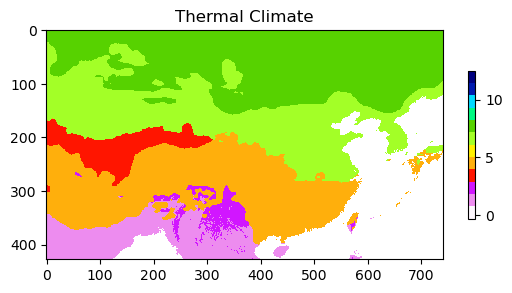

In [18]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(tclimate, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Climate')
plt.colorbar(shrink=0.4)
plt.savefig(out_path+"ThermalClimate.png",bbox_inches ="tight",dpi=300) #Save as PNG image
plt.show()

In [19]:
# expect >1s run time for china
# non-vectorized: expect ~35 seconds run time for china
start=timer()

tzone = clim_reg.getThermalZone()

task_time=timer()-start
task_time

computing meanT_monthly
in UtlitiesCalc, computing monthly aggregate in parallel
computing meanT_monthly_sealevel
in UtlitiesCalc, computing monthly aggregate in parallel


2.652279853820801

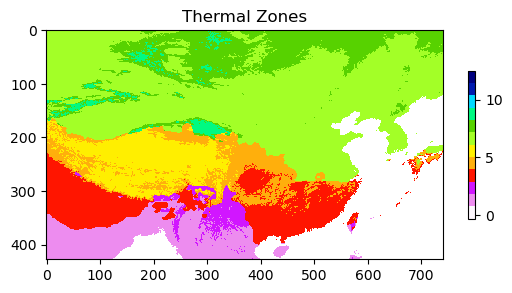

In [20]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(tzone, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Zones')
plt.colorbar(shrink=0.4)
plt.savefig(out_path+"ThermalZone"+revname+".png",bbox_inches ="tight",dpi=300) #Save as PNG image
plt.show()

In [21]:
# expect >1s run time for china
# non-vectorized: expect ~1 second run time for china
start=timer()

lgpt0 = clim_reg.getThermalLGP0()
lgpt5 = clim_reg.getThermalLGP5()
lgpt10 = clim_reg.getThermalLGP10()

task_time=timer()-start
task_time

1.3303532600402832

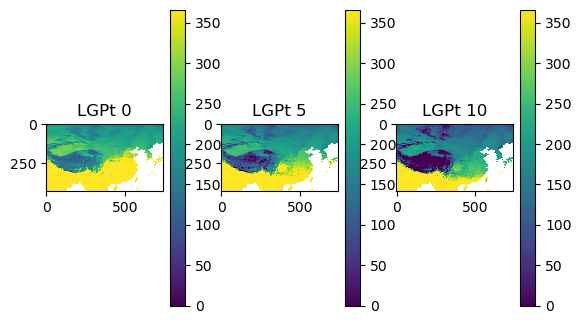

In [22]:
'''save and visualize result'''
#======================
# plt.figure(figsize=(20, 4),dpi=300)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366,interpolation='none')
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig(out_path+"ThermalLGPs"+revname+".png",
            bbox_inches="tight", dpi=300)
plt.show()
#======================

In [23]:
# expect >1s run time for china
# non-vectorized: expect ~1 second run time for china
start=timer()

tsum0 = clim_reg.getTemperatureSum0()
tsum5 = clim_reg.getTemperatureSum5()
tsum10 = clim_reg.getTemperatureSum10()

task_time=timer()-start
task_time

in ClimateRegime, computing tsum0 in parallel


1.6196119785308838

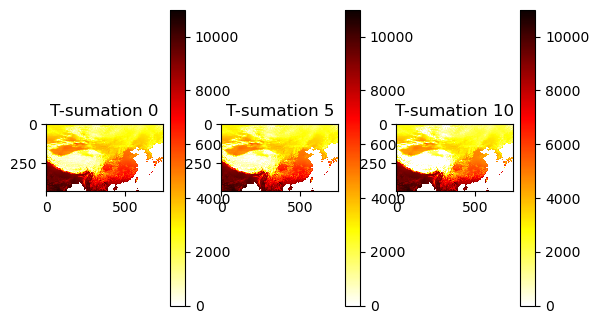

In [24]:
'''save and visualize result'''
#======================
# plt.figure(1, figsize=(20, 4),dpi=300)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig(out_path+"Tsum_"+revname+".png",
            bbox_inches="tight", dpi=300)
plt.show()
#======================

In [25]:
# vectorized+parallel: expect ~1 second run time for china
# vectorized: expect ~6 seconds run time for china
# non-vectorized: expect ~50 seconds run time for china
start=timer()

tprofile = clim_reg.getTemperatureProfile()

task_time=timer()-start
task_time

in ClimateRegime, computing temperature profiles


2.590472936630249

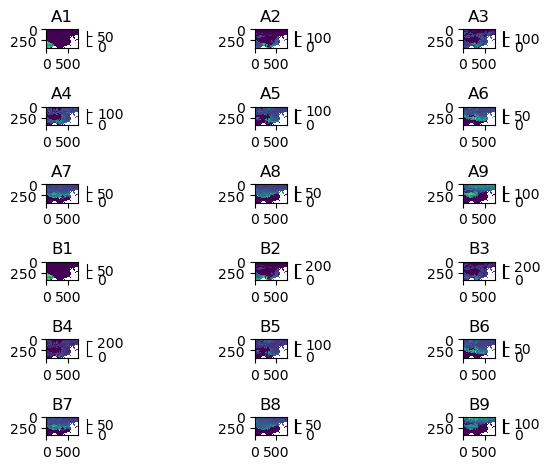

In [26]:
'''save and visualize result'''
tile_list = ['A1','A2','A3','A4','A5','A6','A7','A8','A9',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

# fig = plt.figure(figsize=(12, 12))
fig = plt.figure()
for i1 in range(1, 19):
    plt.subplot(6, 3, i1)
    plt.imshow(tprofile[i1-1],interpolation='none')
    plt.title(tile_list[i1-1])
    plt.colorbar(shrink=0.8)
plt.tight_layout()

plt.savefig(out_path+"Tprofiles_"+revname+".png",bbox_inches="tight", dpi=300)
plt.show()

In [27]:
# start=timer()

# lgp = clim_reg.getLGP(Sa=100., D=1.)

# task_time=timer()-start
# task_time

In [28]:
# lgp

array([[180., 180., 180., ...,  92., 100., 103.],
       [180., 180., 180., ..., 104.,  94., 112.],
       [181., 181., 181., ...,  98., 100., 114.],
       ...,
       [365., 365., 365., ...,  nan,  nan,  nan],
       [365., 365., 365., ...,  nan,  nan,  nan],
       [365., 365., 365., ...,  nan,  nan,  nan]], dtype=float32)

In [28]:
# vectorized+parallel: expect ~66 seconds run time for china
# vectorized: expect ~1.5 minutes run time for china
# non-vectorized: expect ~6 minutes run time for china
start=timer()

lgp = clim_reg.getLGP(Sa=100., D=1.)
lgp_class = clim_reg.getLGPClassified(lgp)
lgp_equv = clim_reg.getLGPEquivalent()

task_time=timer()-start
task_time

in UtlitiesCalc, computing monthly aggregate in parallel
in LGPCalc, computing ET component for day 1
in LGPCalc, computing ET component for day 2
in LGPCalc, computing ET component for day 3
in LGPCalc, computing ET component for day 4
in LGPCalc, computing ET component for day 5
in LGPCalc, computing ET component for day 6
in LGPCalc, computing ET component for day 7
in LGPCalc, computing ET component for day 8
in LGPCalc, computing ET component for day 9
in LGPCalc, computing ET component for day 10
in LGPCalc, computing ET component for day 11
in LGPCalc, computing ET component for day 12
in LGPCalc, computing ET component for day 13
in LGPCalc, computing ET component for day 14
in LGPCalc, computing ET component for day 15
in LGPCalc, computing ET component for day 16
in LGPCalc, computing ET component for day 17
in LGPCalc, computing ET component for day 18
in LGPCalc, computing ET component for day 19
in LGPCalc, computing ET component for day 20
in LGPCalc, computing ET compone

86.80547857284546

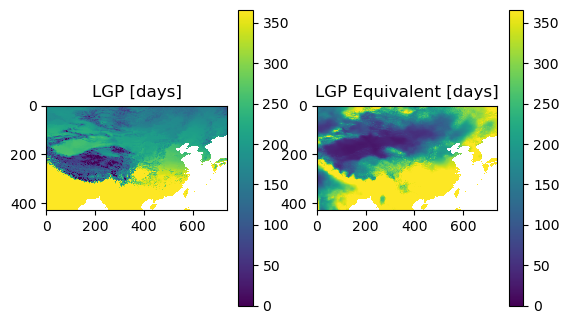

<Figure size 640x480 with 0 Axes>

In [29]:
'''save and visualize result'''
# fig = plt.figure(figsize=(20, 4))
fig = plt.figure()
# fig = plt.figure(figsize=(10, 8),dpi=600)
plt.subplot(121)
plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP [days]')
plt.colorbar(shrink=0.8)
# plt.savefig(out_path+"LGP_"+revname+".png", bbox_inches="tight", dpi=600)
# plt.show()

# fig = plt.figure(figsize=(20, 8),dpi=600)
plt.subplot(122)
plt.imshow(lgp_equv, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP Equivalent [days]')
plt.colorbar(shrink=0.8)
# plt.savefig(out_path+"LGP_Equv_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

plt.savefig(out_path+"LGP_and_LGP_Equv_"+revname+".png",bbox_inches="tight", dpi=300)

In [ ]:
def ETtest(dstart,dend,cdims,lat,alt,tmn,tmx,u2m,srad,rh):
    # print('implementing data value limits')
    nlats=cdims[0]
    nlons=cdims[1]

    # print('tavg,lam,dayoyr,ndays')
    tavg = 0.5*(tmn + tmx)  # Averaged temperature  #KLG
    lam = 2.501 - 0.002361 * tavg  # Latent heat of vaporization
    dayoyr = np.arange(dstart, dend+1)  # Julien Days #KLG
    ndays=len(dayoyr)  #KLG            

    # print('es_tmin,es_tmax,es,ea')
    es_tmin = 0.6108 * np.exp((17.27 * tmn) / (tmn + 237.3))
    es_tmax = 0.6108 * np.exp((17.27 * tmx) / (tmx + 237.3))
    es = 0.5*(es_tmin + es_tmax)
    ea = rh * es  # Actual Vapor Pressure derived from relative humidity

    # print('dlmx,dlmn,dl')
    dlmx = 4098. * es_tmax / (tmx + 237.3)**2
    dlmn = 4098. * es_tmin / (tmn + 237.3)**2
    del es_tmin, es_tmax  #KLG
    dl = 0.5* (dlmx + dlmn)
    del dlmx,dlmn  #KLG

    # print('ap and constants')
    ap = 101.3*np.power(((293-(0.0065*alt))/293), 5.256)
    ap = np.tile(ap[:,:,np.newaxis],(1,1,ndays))  
    gam = 0.0016286 * ap/lam
    hw = 200.
    ht = 190.
    hc = 12
    Rl = 100  
    RLAI = 24 * 0.12
    rhoc = Rl/(0.5*RLAI)  
    del ap

    # print('rhoa,gamst')
    rhoa = 208/u2m
    gamst = gam * (1. + rhoc/rhoa)

    # print('lat,sdcl')
    latr = lat * np.pi/180.
    latr3D = np.tile(latr[:,:,np.newaxis],(1,1,ndays))
    del latr
    sdcl = 0.4093 * np.sin(0.017214206 * dayoyr - 1.405)
    sdcl3D = np.tile(sdcl[np.newaxis, np.newaxis,:], (nlats,nlons,1))
    del sdcl

    # print('xx,yy,zz')
    xx = np.sin(sdcl3D) * np.sin(latr3D)
    yy = np.cos(sdcl3D) * np.cos(latr3D)
    zz = xx/yy

    # print('omg,dayhr')
    with np.errstate(invalid='ignore'):
        omg = np.tan(zz / (1. - zz*zz)**0.5) + 1.5708
    dayhr = 24. * (omg/np.pi)

    omg=np.where((np.abs(zz)>=0.9999)&(zz>0),np.pi,omg)
    dayhr=np.where((np.abs(zz) >= 0.9999)&(zz > 0), 23.999,dayhr)
    omg=np.where((np.abs(zz) >= 0.9999)&(zz <= 0),0,omg)
    dayhr=np.where((np.abs(zz) >= 0.9999)&(zz <= 0), 0.001,dayhr)
    del latr3D,sdcl3D,zz

    # print('sdst,ra')
    sdst = 1.0 + 0.033 * np.cos(0.017214206 * dayoyr)
    sdst3D = np.tile(sdst[np.newaxis, np.newaxis,:], (nlats,nlons,1))
    del sdst
    ra = 37.586 * sdst3D * (omg*xx + np.sin(omg)*yy)
    # ra = 37.586 * sdst3D * (omg_rev2*xx + np.sin(omg_rev2)*yy)
    # del sdst3D, sdst, omg, omg_rev1, omg_rev2, dayhr, dayhr_rev1, dayhr_rev2, xx, yy       
    del sdst3D, omg, dayhr, xx, yy       

    # print('rs,rs0')
    rs = srad  
    alt3D=np.tile(alt[:,:,np.newaxis],(1,1,ndays)) 
    del alt
    rs0 = (0.75 + 0.00002 * alt3D) * ra
    del alt3D

    # print('rns,rnl')
    rns = 0.77 * rs
    sub_cst = 0.000000004903
    with np.errstate(invalid='ignore',divide='ignore'):
        rs_div_ds0=rs/rs0
    rnl = (((273.16+tmx)**4)+((273.16 + tmn)**4)) * \
        (0.34 - (0.14*(ea**0.5))) * \
        ((1.35*(rs_div_ds0))-0.35)*sub_cst/2
    del rs0,rs,rs_div_ds0,tmx,tmn

    # print('rn')
    rn = rns - rnl
    del rns,rnl

    # print('ta_diff,G')
    ta_diff=np.diff(tavg,n=1,axis=2,prepend=tavg[:,:,-1:])  #KLG
    G = 0.14 * ta_diff  #KLG
    del ta_diff

    # print('et0ady')
    et0ady = gam/(dl+gamst) * 900./(tavg+273.) * u2m * (es-ea)
    del gam,tavg,es,ea

    # print('et0rad')
    et0rad = dl/(dl+gamst) * (rn-G) / lam
    del dl,gamst,rn,G,lam

    # print('et0')
    et0 = et0ady + et0rad
    del et0ady,et0rad

    # print('et0_out')
    et0_out=np.where(et0<0,0,et0)

    return et0_out
    # return doy_start,doy_end,chunkdims,latitude,alt,min_temp,max_temp,u2m,shortrad_daily_MJm2day,rel_humidity
    # return alt

In [ ]:
def setDailyClimateData(self, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity):

    self.doy_start=1  #KLG
    self.doy_end=min_temp.shape[2]  #KLG 
    
    print('rechunking and delaying inputs')
    min_temp=min_temp.rechunk(chunks=self.chunk3D)
    max_temp=max_temp.rechunk(chunks=self.chunk3D)
    tmn_delay=min_temp.to_delayed()
    tmx_delay=max_temp.to_delayed()

    short_rad=short_rad.rechunk(chunks=self.chunk3D) # chunk
    short_rad=da.where(short_rad < 0, 0, short_rad)  # elim negatives
    short_rad = (short_rad*3600.*24.)/1000000.       # convert units
    srad_delay=short_rad.to_delayed()
    del short_rad

    wind_speed=wind_speed.rechunk(chunks=self.chunk3D)     # chunk
    # wind_speed=da.where(wind_speed < 0, 0, wind_speed)     # elim negative
    wind_speed=da.where(wind_speed < 0.5, 0.5, wind_speed) # elim negative and small values
    wind_delay=wind_speed.to_delayed()

    rel_humidity=rel_humidity.rechunk(chunks=self.chunk3D)        # chunk
    rel_humidity=da.where(rel_humidity > 0.99, 0.99,rel_humidity) # elim high values
    rel_humidity=da.where(rel_humidity < 0.05, 0.05,rel_humidity) # elim low values
    rh_delay=rel_humidity.to_delayed()
    del rel_humidity

    lat_delay=self.latitude.to_delayed()
    elev_delay=self.elevation.to_delayed()        


    print('getting chunk shapes')
    chunk_shapes=dask.compute([chunk.shape for chunk in tmn_delay.ravel()])
    print('zipping delayed inputs')
    zipvars=zip(chunk_shapes[0][:],lat_delay.ravel(),elev_delay.ravel(),tmn_delay.ravel(),tmx_delay.ravel(),wind_delay.ravel(),srad_delay.ravel(),rh_delay.ravel())
    print('creating task list')
    task_list=[dask.delayed(ETtest)(self.doy_start,self.doy_end,cshape,lat,el,tmn,tmx,u,srad,rh) for cshape,lat,el,tmn,tmx,u,srad,rh in zipvars]

    print('COMPUTING')
    result_chunks=dask.compute(*task_list)
    print('CONCATENATING')
    self.pet_daily=np.concatenate(result_chunks,axis=1)
    # return result_chunks


    print('computing meanT, meanT_daily_sealevel, P_by_PET_daily')
    self.meanT_daily = 0.5*(min_temp+max_temp)  #KLG

    # sea level temperature
    # P over PET ratio (to eliminate nan in the result, nan is replaced with zero)
    if self.parallel:
        self.meanT_daily_sealevel = self.meanT_daily + (da.tile(self.elevation[:,:,np.newaxis],(1,1,self.doy_end)).rechunk(chunks=self.chunk3D)/100*0.55)
        precipitation=precipitation.rechunk(chunks=self.chunk3D)
        with np.errstate(invalid='ignore',divide='ignore'):
            self.P_by_PET_daily = da.nan_to_num(precipitation / self.pet_daily)
    else:
        self.meanT_daily_sealevel = self.meanT_daily + np.expand_dims(self.elevation/100*0.55,axis=2) # automatic broadcasting #KLG        
        with np.errstate(invalid='ignore',divide='ignore'):
            self.P_by_PET_daily = np.nan_to_num(precipitation / self.pet_daily)

    self.set_monthly = False

    print('computing interp_daily_temp')
    # smoothed daily temperature
    # create a mask of all 1's if the user doesn't provide a mask
    if self.set_mask:
        mask=self.im_mask
    else:
        mask=np.ones((self.im_height,self.im_width),dtype='int')

    obj_utilities = UtilitiesCalc.UtilitiesCalc(self.chunk2D,self.chunk3D)  #KLG
    self.interp_daily_temp=obj_utilities.smoothDailyTemp(self.doy_start,self.doy_end, mask, self.meanT_daily,self.chunk3D)

    print('copying maxT_daily,minT_daily,totalPrec_daily')
    self.maxT_daily = max_temp
    # self.minT_daily = min_temp
    self.totalPrec_daily = precipitation  #KLG   

In [ ]:
clim_reg.chunk3D, clim_reg.chunksize3D_MB

In [ ]:
setDailyClimateData(clim_reg, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

In [ ]:
# clim_reg.pet_daily # numpy array
# clim_reg.meanT_daily  # dask array
# clim_reg.meanT_daily_sealevel  # dask_array
# clim_reg.P_by_PET_daily  # dask array
# clim_reg.maxT_daily  # dask array
# clim_reg.totalPrec_daily  # dask array
# clim_reg.interp_daily_temp  # numpy array

In [ ]:
prsum=clim_reg.totalPrec_daily.sum(axis=2).compute()

In [ ]:
clim_reg.P_by_PET_daily.compute()

In [ ]:
# this normal numpy calculation works just fine with 5GB inputs

print('implementing data value limits')
doy_start=1  #KLG
doy_end=min_temp.shape[2]  #KLG
nlats=min_temp.shape[0]
nlons=min_temp.shape[1]

rel_humidity=np.where(rel_humidity > 0.99, 0.99,rel_humidity)
rel_humidity=np.where(rel_humidity < 0.05, 0.05,rel_humidity)
short_rad=np.where(short_rad < 0, 0, short_rad)
shortrad_daily_MJm2day = (short_rad*3600.*24.)/1000000.
del short_rad
# wind_speed=da.where(wind_speed < 0, 0, wind_speed)  
u2m=np.where(wind_speed < 0.5, 0.5, wind_speed)

print('tavg,lam,dayoyr,ndays')
tavg = 0.5*(min_temp + max_temp)  # Averaged temperature  #KLG
lam = 2.501 - 0.002361 * tavg  # Latent heat of vaporization

dayoyr = np.arange(doy_start, doy_end+1)  # Julien Days #KLG
ndays=len(dayoyr)  #KLG            
# alt=np.tile(clim_reg.elevation[:,:,np.newaxis],(1,1,ndays))  # 3D altitude #KLG
alt=elevation

print('es_tmin,es_tmax,es,ea')
es_tmin = 0.6108 * np.exp((17.27 * min_temp) / (min_temp + 237.3))
es_tmax = 0.6108 * np.exp((17.27 * max_temp) / (max_temp + 237.3))
es = 0.5*(es_tmin + es_tmax)
ea = rel_humidity * es  # Actual Vapor Pressure derived from relative humidity

print('dlmx,dlmn,dl')
dlmx = 4098. * es_tmax / (max_temp + 237.3)**2
dlmn = 4098. * es_tmin / (min_temp + 237.3)**2
# del es_tmin, es_tmax  #KLG
dl = 0.5* (dlmx + dlmn)
# del dlmx,dlmn  #KLG

print('ap and constants')
ap = 101.3*np.power(((293-(0.0065*alt))/293), 5.256)
ap = np.tile(ap[:,:,np.newaxis],(1,1,ndays))  
gam = 0.0016286 * ap/lam
hw = 200.
ht = 190.
hc = 12
Rl = 100  
RLAI = 24 * 0.12
rhoc = Rl/(0.5*RLAI)  
# del ap

print('rhoa,gamst')
rhoa = 208/u2m
gamst = gam * (1. + rhoc/rhoa)

print('lat,sdcl')
latr = clim_reg.latitude * np.pi/180.
latr3D = np.tile(latr[:,:,np.newaxis],(1,1,ndays))
sdcl = 0.4093 * np.sin(0.017214206 * dayoyr - 1.405)
sdcl3D = np.tile(sdcl[np.newaxis, np.newaxis,:], (nlats,nlons,1))

print('xx,yy,zz')
xx = np.sin(sdcl3D) * np.sin(latr3D)
yy = np.cos(sdcl3D) * np.cos(latr3D)
zz = xx/yy

print('omg,dayhr')
omg = np.tan(zz / (1. - zz*zz)**0.5) + 1.5708
dayhr = 24. * (omg/np.pi)
omg_rev1=np.where((np.abs(zz)>=0.9999)&(zz>0),np.pi,omg)
dayhr_rev1=np.where((np.abs(zz) >= 0.9999)&(zz > 0), 23.999,dayhr)
omg_rev2=np.where((np.abs(zz) >= 0.9999)&(zz <= 0),0,omg_rev1)
dayhr_rev2=np.where((np.abs(zz) >= 0.9999)&(zz <= 0), 0.001,dayhr_rev1)
del latr3D,sdcl3D,latr,sdcl,zz

print('sdst,ra')
sdst = 1.0 + 0.033 * np.cos(0.017214206 * dayoyr)
sdst3D = np.tile(sdst[np.newaxis, np.newaxis,:], (nlats,nlons,1))
ra = 37.586 * sdst3D * (omg_rev2*xx + np.sin(omg_rev2)*yy)
del sdst3D, sdst, omg, omg_rev1, omg_rev2, dayhr, dayhr_rev1, dayhr_rev2, xx, yy       

print('rs,rs0')
rs = shortrad_daily_MJm2day  
alt3D=np.tile(alt[:,:,np.newaxis],(1,1,ndays)) 
rs0 = (0.75 + 0.00002 * alt3D) * ra
del alt3D,alt

print('rns,rnl')
rns = 0.77 * rs
sub_cst = 0.000000004903
rs_div_ds0=rs/rs0
rnl = (((273.16+max_temp)**4)+((273.16 + min_temp)**4)) * \
    (0.34 - (0.14*(ea**0.5))) * \
    ((1.35*(rs_div_ds0))-0.35)*sub_cst/2
del rs0,rs,rs_div_ds0

print('rn')
rn = rns - rnl
del rns,rnl

print('ta_diff,G')
ta_diff=np.diff(tavg,n=1,axis=2,prepend=tavg[:,:,-1:])  #KLG
G = 0.14 * ta_diff  #KLG
del ta_diff

print('et0ady')
et0ady = gam/(dl+gamst) * 900./(tavg+273.) * u2m * (es-ea)
del gam,tavg,es,ea

print('et0rad')
et0rad = dl/(dl+gamst) * (rn-G) / lam
del dl,gamst,rn,G,lam

print('et0')
et0 = et0ady + et0rad
del et0ady,et0rad

print('et0_out')
et0_out=np.where(et0<0,0,et0)

In [ ]:
gam.shape, rhoa.shape

In [ ]:
# gamst

In [ ]:
# nchunks=238
# nlons=min_temp.shape[1]
# chunk_nlons=int(da.ceil(nlons/nchunks))
# chunks3D=(-1,chunk_nlons,-1)
# chunks2D=(-1,chunk_nlons)

# lat_vals=da.linspace(lat_min, lat_max, min_temp.shape[0]).astype('float32')  #KLG
# lat_map=da.tile(lat_vals[:,np.newaxis],(1,min_temp.shape[1])).rechunk(chunks=chunks2D)  #KLG   
# # lat_map=da.broadcast_to(lat_vals,(min_temp.shape[0],min_temp.shape[1]),chunks=chunks2D)
# lat_map

In [ ]:
class ETOCalc(object):
 
    def __init__(self, cycle_begin, cycle_end, latitude, altitude,chunk3D):
        """Initiate a ETOCalc Class instance

        Args:
            cycle_begin (int): Julian day for the beginning of crop cycle
            cycle_end (int): Julian day for the ending of crop cycle
            latitude (float): a latitude value
            altitude (float): an altitude value
        """        
        self.cycle_begin = cycle_begin
        self.cycle_end = cycle_end
        self.latitude = latitude
        self.alt = altitude
        
        self.chunk3D=chunk3D
        if self.chunk3D: self.parallel=True
        else: self.parallel=False
        print('parallel ETO = ',self.parallel)

    def setClimateData(self, min_temp, max_temp, wind_speed, short_rad, rel_humidity):
        """Load the climatic (point) data into the Class

        Args:
            min_temp (float): Minimum temperature [Celcius]
            max_temp (float): Maximum temperature [Celcius]
            wind_speed (float): Windspeed at 2m altitude [m/s]
            short_rad (float): Radiation [MJ/m2.day]
            rel_humidity (float): Relative humidity [decimal percentage]
        """        

        self.minT_daily = min_temp # Celcius
        self.maxT_daily = max_temp # Celcius
        self.u2m = wind_speed # m/s at 2m
        self.shortRad_daily = short_rad # MJ/m2.day
        self.rel_humidity = rel_humidity # Fraction

    def calculateETO(self):  #KLG
        # numba doesn't speed this up in time tests  #KLG
        # removing in favor of vectorization which will allow chunking with dask for speed  #KLG

        """Calculate the reference evapotranspiration with Penmann-Monteith Equation

        Returns:
            ## float: ETo of a single pixel (function is called pixel-wise)
            float: ETo of each pixel  #KLG
        """        
        # if self.parallel:
        #     self.minT_daily=self.minT_daily.persist()
        #     self.maxT_daily=self.maxT_daily.persist()
            # self.windspeed_daily=self.windspeed_daily.persist()
            # self.alt=self.alt.persist()
            # self.latitude=self.latitude.persist()

        # nchunks=238
        # nlons=self.alt.shape[1]
        # chunk_nlons=int(da.ceil(nlons/nchunks))
        # chunks3D=(-1,chunk_nlons,-1)
        # chunks2D=(-1,chunk_nlons)

        print('tavg,lam,alt')
        # constants
        # tavg = 0.5*(maxT_daily+minT_daily)  # Averaged temperature
        tavg = 0.5*(self.minT_daily + self.maxT_daily)  # Averaged temperature  #KLG
        print('tavg.shape=',tavg.shape)
        lam = 2.501 - 0.002361 * tavg  # Latent heat of vaporization
        # if self.parallel:
        #     dayoyr = da.arange(self.cycle_begin, self.cycle_end+1,chunks=-1)  # Julien Days #KLG
        #     ndays=len(dayoyr)  #KLG
        #     alt=da.tile(self.alt[:,:,np.newaxis],(1,1,ndays)).rechunk(chunks=self.chunk3D)
        # else:
            # dayoyr = np.arange(self.cycle_begin, self.cycle_end+1)  # Julien Days #KLG
            # ndays=len(dayoyr)  #KLG            
            # alt=np.tile(self.alt[:,:,np.newaxis],(1,1,ndays))  # 3D altitude #KLG
        dayoyr = np.arange(self.cycle_begin, self.cycle_end+1)  # Julien Days #KLG
        ndays=len(dayoyr)  #KLG            
        alt=np.tile(self.alt[:,:,np.newaxis],(1,1,ndays))  # 3D altitude #KLG

        # print('u2m')
        # Wind speed
        # u2m = windspeed_daily.copy()
        # u2m = self.windspeed_daily.copy()  #KLG
        # limit to no less than 0.5 m/s; FAO 56, p.63
        # u2m[windspeed_daily < 0.5] = 0.5
        # print('u2m.where')
        # if self.parallel:
        #     u2m=da.where(u2m < 0.5, 0.5, u2m)
        # else:
        #     u2m=np.where(u2m < 0.5, 0.5, u2m)
        # u2m=np.where(u2m < 0.5, 0.5, u2m)

        print('es_tmin,es_tmax')
        # Mean Saturation Vapor Pressure derived from air temperature
        # if self.parallel:
        #     es_tmin = 0.6108 * da.exp((17.27 * self.minT_daily) / (self.minT_daily + 237.3))  #KLG
        #     es_tmax = 0.6108 * da.exp((17.27 * self.maxT_daily) / (self.maxT_daily + 237.3))  #KLG
        # else:            
        #     es_tmin = 0.6108 * np.exp((17.27 * self.minT_daily) / (self.minT_daily + 237.3))
        #     es_tmax = 0.6108 * np.exp((17.27 * self.maxT_daily) / (self.maxT_daily + 237.3))
        es_tmin = 0.6108 * np.exp((17.27 * self.minT_daily) / (self.minT_daily + 237.3))
        es_tmax = 0.6108 * np.exp((17.27 * self.maxT_daily) / (self.maxT_daily + 237.3))

        print('es,ea')
        es = 0.5*(es_tmin + es_tmax)
        # ea = rel_humidity * es  # Actual Vapor Pressure derived from relative humidity
        ea = self.rel_humidity * es  # Actual Vapor Pressure derived from relative humidity  #KLG

        print('dlmx,dlmn,dl')
        # slope vapour pressure curve
        # dlmx = 4098. * es_tmax / (maxT_daily + 237.3)**2
        # dlmn = 4098. * es_tmin / (minT_daily + 237.3)**2
        dlmx = 4098. * es_tmax / (self.maxT_daily + 237.3)**2  #KLG
        dlmn = 4098. * es_tmin / (self.minT_daily + 237.3)**2  #KLG
        del es_tmin, es_tmax  #KLG
        dl = 0.5* (dlmx + dlmn)
        del dlmx,dlmn  #KLG

        print('ap,gam')
        # Atmospheric pressure
        # if self.parallel:
        #     ap = 101.3*da.power(((293-(0.0065*alt))/293), 5.256)
        # else:
        #     ap = 101.3*np.power(((293-(0.0065*alt))/293), 5.256)
        ap = 101.3*np.power(((293-(0.0065*alt))/293), 5.256)

            
        # Psychrometric constant
        gam = 0.0016286 * ap/lam
        del ap

        hw = 200.
        ht = 190.
        hc = 12.

        print('rhoa,Rl,RLAI,rhic,gamst')
        # aerodynamic resistance
        rhoa = 208/self.u2m

        # crop canopy resistance
        Rl = 100  # daily stomata resistance of a single leaf (s/m)
        # Standard is xLAO = 24
        RLAI = 24 * 0.12
        rhoc = Rl/(0.5*RLAI)  # crop canopy resistance

        gamst = gam * (1. + rhoc/rhoa)

        print('latr')
        # latr = latitude * np.pi/180.
        latr = self.latitude * np.pi/180.
        # if self.parallel:
        #     latr=da.tile(latr[:,:,np.newaxis],(1,1,ndays)).rechunk(chunks=self.chunk3D)
        # else:
        #     latr = np.tile(latr[:,:,np.newaxis],(1,1,ndays))
        # latr = np.tile(latr[:,:,np.newaxis],(1,1,ndays))

        print('sdcl')
        # (a) calculate extraterrestrial radiation
        # solar declination (rad)
        # if self.parallel:
        #     sdcl = 0.4093 * da.sin(0.017214206 * dayoyr - 1.405)
        #     sdcl=da.broadcast_to(sdcl,(tavg.shape[0],tavg.shape[1],tavg.shape[2]),chunks=self.chunk3D)
        # else:
        #     sdcl = 0.4093 * np.sin(0.017214206 * dayoyr - 1.405)
        #     sdcl = np.tile(sdcl[np.newaxis, np.newaxis,:], (tavg.shape[0],tavg.shape[1],1))
        sdcl = 0.4093 * np.sin(0.017214206 * dayoyr - 1.405)
        # sdcl = np.tile(sdcl[np.newaxis, np.newaxis,:], (tavg.shape[0],tavg.shape[1],1))
        
        print('sdst')
        # relative distance earth to sun
        # if self.parallel:
        #     sdst = 1.0 + 0.033 * da.cos(0.017214206 * dayoyr)
        #     sdst=da.broadcast_to(sdst,(tavg.shape[0],tavg.shape[1],tavg.shape[2]),chunks=self.chunk3D)
        # else:
        #     sdst = 1.0 + 0.033 * np.cos(0.017214206 * dayoyr)
        #     sdst=np.tile(sdst[np.newaxis, np.newaxis,:], (tavg.shape[0],tavg.shape[1],1))
        sdst = 1.0 + 0.033 * np.cos(0.017214206 * dayoyr)
        # sdst=np.tile(sdst[np.newaxis, np.newaxis,:], (tavg.shape[0],tavg.shape[1],1))
        del dayoyr

        print('xx,yy,zz')
        # if self.parallel:
        #     xx = da.sin(sdcl) * da.sin(latr)
        #     yy = da.cos(sdcl) * da.cos(latr)            
        # else:
        #     xx = np.sin(sdcl) * np.sin(latr)
        #     yy = np.cos(sdcl) * np.cos(latr)
        xx = np.sin(sdcl) * np.sin(latr)
        yy = np.cos(sdcl) * np.cos(latr)
        zz = xx/yy

        print('omg,dayhr')
        # if self.parallel:
        #     omg = da.tan(zz / (1. - zz*zz)**0.5) + 1.5708
        # else:
        #     omg = np.tan(zz / (1. - zz*zz)**0.5) + 1.5708
        omg = np.tan(zz / (1. - zz*zz)**0.5) + 1.5708
        dayhr = 24. * (omg/np.pi)

        # if self.parallel:
        #     print('omg.where,dayhr.where,ra')
        #     omg=da.where((da.abs(zz)>=0.9999)&(zz>0),np.pi,omg)
        #     dayhr=da.where((da.abs(zz) >= 0.9999)&(zz > 0), 23.999,dayhr)

        #     omg=da.where((da.abs(zz) >= 0.9999)&(zz <= 0),0,omg)
        #     dayhr=da.where((da.abs(zz) >= 0.9999)&(zz <= 0), 0.001,dayhr)

        #     print('ra')
        #     ra = 37.586 * sdst * (omg*xx + da.sin(omg)*yy)
        # else:
        #     print('omg.where,dayhr.where,ra')
        #     omg=np.where((np.abs(zz)>=0.9999)&(zz>0),np.pi,omg)
        #     dayhr=np.where((np.abs(zz) >= 0.9999)&(zz > 0), 23.999,dayhr)

        #     omg=np.where((np.abs(zz) >= 0.9999)&(zz <= 0),0,omg)
        #     dayhr=np.where((np.abs(zz) >= 0.9999)&(zz <= 0), 0.001,dayhr) 
            
        #     print('ra')
        #     ra = 37.586 * sdst * (omg*xx + np.sin(omg)*yy)
        print('omg.where,dayhr.where,ra')
        omg_rev1=np.where((np.abs(zz)>=0.9999)&(zz>0),np.pi,omg)
        dayhr_rev1=np.where((np.abs(zz) >= 0.9999)&(zz > 0), 23.999,dayhr)

        omg_rev2=np.where((np.abs(zz) >= 0.9999)&(zz <= 0),0,omg_rev1)
        dayhr_rev2=np.where((np.abs(zz) >= 0.9999)&(zz <= 0), 0.001,dayhr_rev1) 
        
        print('ra')
        ra = 37.586 * sdst * (omg_rev2*xx + np.sin(omg_rev2)*yy)
        del sdcl, latr, sdst, omg, omg_rev1, omg_rev2, dayhr, dayhr_rev1, dayhr_rev2, xx, yy, zz        

        print('rs,rs0')
        # (b) solar radiation Rs (0.25, 0.50 Angstrom coefficients)
        # rs = (0.25 + (0.50 * (sd/dayhr))) * ra
        # rs = shortRad_daily
        rs = self.shortRad_daily  #KLG
        # rs0 = (0.75 + 0.00002 * alt) * ra
        rs0 = (0.75 + 0.00002 * self.alt) * ra
        
        del alt

        print('rns,rnl')
        # (c) net shortwave radiation Rns = (1 - alpha) * Rs
        # (alpha for grass = 0.23)
        rns = 0.77 * rs

        # (d) net longwave radiation Rnl
        # Stefan-Boltzmann constant [MJ K-4 m-2 day-1]
        sub_cst = 0.000000004903
        rs_div_ds0=rs/rs0
        rnl = (((273.16+self.maxT_daily)**4)+((273.16 + self.minT_daily)**4)) * \
            (0.34 - (0.14*(ea**0.5))) * \
            ((1.35*(rs_div_ds0))-0.35)*sub_cst/2
        del rs0,rs

        print('rn')
        # (e) net radiation Rn = Rns - Rnl
        rn = rns - rnl
        del rns,rnl

        print('ta_diff,G')
        # (f) soil heat flux [MJ/m2/day]
        # if self.parallel:
        #     ta_diff=da.diff(tavg,n=1,axis=2,prepend=tavg[:,:,-1:])  #KLG
        # else:
        #     ta_diff=np.diff(tavg,n=1,axis=2,prepend=tavg[:,:,-1:])  #KLG
        ta_diff=np.diff(tavg,n=1,axis=2,prepend=tavg[:,:,-1:])  #KLG
        G = 0.14 * ta_diff  #KLG
        del ta_diff

        print('et0ady')
        # (g) calculate aerodynamic and radiation terms of ET0
        et0ady = gam/(dl+gamst) * 900./(tavg+273.) * self.u2m * (es-ea)
        del gam,tavg,es,ea

        print('et0rad')
        et0rad = dl/(dl+gamst) * (rn-G) / lam
        del dl,gamst,rn,G,lam

        print('et0')
        et0 = et0ady + et0rad
        del et0ady,et0rad

        print('et0.where')
        # et0[et0 < 0] = 0
        # if self.parallel:
        #     et0=da.where(et0<0,0,et0)
        # else:
        #     et0=np.where(et0<0,0,et0)
        et0=np.where(et0<0,0,et0)

        return et0

In [ ]:
def compute_pet(doy_start, doy_end, chunk3D, latitude, elevation, min_temp, max_temp, wind_speed, short_rad, rel_humidity):
    print('initializing obj_eto')
    obj_eto = ETOCalc(doy_start, doy_end, latitude, elevation, chunk3D)  #KLG
    
    print('adjusting short_rad units')
    shortrad_daily_MJm2day = (short_rad*3600.*24.)/1000000. # convert w/m2 to MJ/m2/day  #KLG    

    print('obj_eto.setClimateData')
    obj_eto.setClimateData(min_temp, max_temp, wind_speed, shortrad_daily_MJm2day, rel_humidity)  #KLG

    pet_daily= obj_eto.calculateETO()
    return pet_daily


In [ ]:
def setDailyClimateData(self, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity):

    if self.parallel:
        print('rechunking')
        min_temp=min_temp.rechunk(chunks=self.chunk3D).to_delayed()
        max_temp=max_temp.rechunk(chunks=self.chunk3D).to_delayed()
        # precipitation=precipitation.rechunk(chunks=self.chunk3D)
        short_rad=short_rad.rechunk(chunks=self.chunk3D)
        wind_speed=wind_speed.rechunk(chunks=self.chunk3D)
        rel_humidity=rel_humidity.rechunk(chunks=self.chunk3D)
        # latitude and elevation are already chunked correctly    

        print('removing negative data values')
        rel_humidity=da.where(rel_humidity > 0.99, 0.99,rel_humidity)
        rel_humidity=da.where(rel_humidity < 0.05, 0.05,rel_humidity)
        short_rad=da.where(short_rad < 0, 0, short_rad)
        # wind_speed=da.where(wind_speed < 0, 0, wind_speed)  
        wind_speed=da.where(wind_speed < 0.5, 0.5, wind_speed)

        rel_humidity=rel_humidity.to_delayed()
        short_rad=short_rad.to_delayed()
        wind_speed=wind_speed.to_delayed()

        latitude=self.latitude.to_delayed()
        elevation=self.elevation.to_delayed()        

    self.doy_start=1  #KLG
    self.doy_end=min_temp.shape[2]  #KLG

    task_list=[dask.delayed(compute_pet)(self.doy_start,self.doy_end,self.chunk3D, lat_chunk, elev_chunk, minT_chunk, maxT_chunk, wind_chunk, rad_chunk, rhum_chunk) for lat_chunk, elev_chunk, minT_chunk, maxT_chunk, wind_chunk, rad_chunk, rhum_chunk in zip(latitude[0,:], elevation[0,:], min_temp[0,:], max_temp[0,:], wind_speed[0,:], short_rad[0,:], rel_humidity[0,:])]

    result_chunks=dask.compute(*task_list)
    self.pet_daily=np.concat(result_chunks)

In [ ]:
setDailyClimateData(clim_reg, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

In [ ]:
def setDailyClimateData(self, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity):
    # print('converting inputs to dask arrays')
    # nchunks=238
    # nlons=min_temp.shape[1]
    # chunk_nlons=int(np.ceil(nlons/nchunks))
    # chunks3D=(-1,chunk_nlons,-1)
    # chunks2D=(-1,chunk_nlons)
    # print(nchunks,nlons,chunk_nlons,chunks3D)

    # min_temp=da.from_array(min_temp,chunks=chunks3D)
    # max_temp=da.from_array(max_temp,chunks=chunks3D)
    # precipitation=da.from_array(precipitation,chunks=chunks3D)
    # short_rad=da.from_array(short_rad,chunks=chunks3D)
    # wind_speed=da.from_array(wind_speed,chunks=chunks3D)
    # rel_humidity=da.from_array(rel_humidity,chunks=chunks3D)
    # latitude=da.from_array(self.latitude,chunks=chunks2D)
    # elevation=da.from_array(self.elevation,chunks=chunks2D)
    if self.parallel:
        print('rechunking')
        min_temp=min_temp.rechunk(chunks=self.chunk3D)
        max_temp=max_temp.rechunk(chunks=self.chunk3D)
        precipitation=precipitation.rechunk(chunks=self.chunk3D)
        short_rad=short_rad.rechunk(chunks=self.chunk3D)
        wind_speed=wind_speed.rechunk(chunks=self.chunk3D)
        rel_humidity=rel_humidity.rechunk(chunks=self.chunk3D)
        # latitude and elevation are already chunked correctly

        # min_temp=min_temp.persist()
        # max_temp=max_temp.persist()
        # precipitation=precipitation.persist()
        # short_rad=short_rad.persist()
        # wind_speed=wind_speed.persist()
        # rel_humidity=rel_humidity.persist()        

        print('removing negative data values')
        rel_humidity=da.where(rel_humidity > 0.99, 0.99,rel_humidity)
        rel_humidity=da.where(rel_humidity < 0.05, 0.05,rel_humidity)
        short_rad=da.where(short_rad < 0, 0, short_rad)
        wind_speed=da.where(wind_speed < 0, 0, wind_speed)  


    else:
        print('removing negative data values')
        rel_humidity[rel_humidity > 0.99] = 0.99
        rel_humidity[rel_humidity < 0.05] = 0.05
        short_rad[short_rad < 0] = 0
        wind_speed[wind_speed < 0] = 0

    self.doy_start=1  #KLG
    self.doy_end=min_temp.shape[2]  #KLG



    # calculation of reference evapotranspiration (ETo)  #KLG
    print('initializing obj_eto')
    obj_eto = ETOCalc(self.doy_start, self.doy_end, self.latitude, self.elevation,self.chunk3D)  #KLG

    print('adjusting short_rad units')
    shortrad_daily_MJm2day = (short_rad*3600.*24.)/1000000. # convert w/m2 to MJ/m2/day  #KLG
    # shortrad_daily_MJm2day=shortrad_daily_MJm2day.persist()
    print('obj_eto.setClimateData')
    obj_eto.setClimateData(min_temp, max_temp, wind_speed, shortrad_daily_MJm2day, rel_humidity)  #KLG
    del rel_humidity,short_rad,wind_speed,shortrad_daily_MJm2day  #KLG
    # print('pet equations')
    # pet_daily= obj_eto.calculateETO()   #KLG
    # print(pet_daily)
    print('computing pet')
    if self.parallel:
        # self.pet_daily=pet_daily.compute()
        self.pet_daily= obj_eto.calculateETO().compute()   #KLG
        # self.pet_daily= obj_eto.calculateETO()

    else:
        self.pet_daily= obj_eto.calculateETO()
    del obj_eto

    # print('computing meanT, meanT_daily_sealevel, P_by_PET_daily')
    # self.meanT_daily = 0.5*(min_temp+max_temp)  #KLG

    # # sea level temperature
    # # P over PET ratio (to eliminate nan in the result, nan is replaced with zero)
    # if self.parallel:
    #     self.meanT_daily_sealevel = self.meanT_daily + (da.tile(self.elevation[:,:,np.newaxis],(1,1,self.doy_end)).rechunk(chunks=self.chunk3D)/100*0.55)
    #     self.P_by_PET_daily = da.nan_to_num(precipitation / self.pet_daily)
    # else:
    #     self.meanT_daily_sealevel = self.meanT_daily + np.expand_dims(self.elevation/100*0.55,axis=2) # automatic broadcasting #KLG        
    #     self.P_by_PET_daily = np.nan_to_num(precipitation / self.pet_daily)

    # self.set_monthly = False

    # print('computing interp_daily_temp')
    # # smoothed daily temperature
    # # create a mask of all 1's if the user doesn't provide a mask
    # if self.set_mask:
    #     mask=self.im_mask
    # else:
    #     mask=np.ones((self.im_height,self.im_width),dtype='int')

    # obj_utilities = UtilitiesCalc.UtilitiesCalc(self.chunk2D,self.chunk3D)  #KLG

    # # if self.parallel:
    # self.interp_daily_temp=obj_utilities.smoothDailyTemp(self.doy_start,self.doy_end, mask, self.meanT_daily,self.chunk3D)
    # # else:
    #     # self.interp_daily_temp=obj_utilities.smoothDailyTemp(self.doy_start,self.doy_end, mask, self.meanT_daily)  

    # print('copying maxT_daily,minT_daily,totalPrec_daily')
    # self.maxT_daily = max_temp
    # # self.minT_daily = min_temp
    # self.totalPrec_daily = precipitation  #KLG    
    
          


In [ ]:
setDailyClimateData(clim_reg, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

In [ ]:
clim_reg.pet_daily.shape,clim_reg.nchunks

In [ ]:
data_labels=clim_reg.__dict__.keys()
data_labels

In [ ]:
if clim_reg.set_mask:
    mask=clim_reg.im_mask
else:
    mask=np.ones((clim_reg.im_height,clim_reg.im_width),dtype='int')

# this takes 100s
# days = np.arange(clim_reg.doy_start,clim_reg.doy_end+1) # x values  #KLG
# mask3D = np.tile(mask[:,:,np.newaxis], (1,1,days.shape[0]))  #KLG
# data=np.where(mask3D==0,0,clim_reg.meanT_daily)   #KLG
# data2D=data.transpose(2,0,1).reshape(days.shape[0],-1) # every column is a set of y values  #KLG
# del data  #KLG
# quad_spl=np.polynomial.polynomial.polyfit(days,data2D,deg=5)  #KLG
# interp_daily_temp=np.polynomial.polynomial.polyval(days,quad_spl)  #KLG
# interp_daily_temp=interp_daily_temp.reshape(mask3D.shape[0],mask3D.shape[1],-1)  #KLG
# interp_daily_temp=np.where(mask3D==0,np.nan,interp_daily_temp)        
# interp_daily_temp.shape

# this takes 33s
# days = np.arange(clim_reg.doy_start,clim_reg.doy_end+1) # x values  #KLG
# mask3D = da.tile(mask[:,:,np.newaxis], (1,1,days.shape[0])).rechunk(chunks=clim_reg.chunk3D)  #KLG
# data=da.where(mask3D==0,0,clim_reg.meanT_daily)   #KLG
# nlats=data.shape[0]
# data2D=data.transpose(2,0,1).reshape(days.shape[0],-1).rechunk(chunks=(clim_reg.chunk3D[0],clim_reg.chunk3D[1]*nlats)) # every column is a set of y values  #KLG
# coefs=np.polynomial.polynomial.polyfit(days,data2D,deg=5)  #KLG
# interp_daily_temp=np.polynomial.polynomial.polyval(days,coefs)  #KLG
# interp_daily_temp.shape


# # this takes 33s
# days = np.arange(clim_reg.doy_start,clim_reg.doy_end+1) # x values  #KLG
# mask3D = da.tile(mask[:,:,np.newaxis], (1,1,days.shape[0])).rechunk(chunks=clim_reg.chunk3D)  #KLG
# data=da.where(mask3D==0,0,clim_reg.meanT_daily)   #KLG
# nlats=data.shape[0]
# data2D=data.transpose(2,0,1).reshape(days.shape[0],-1).rechunk(chunks=(clim_reg.chunk3D[0],clim_reg.chunk3D[1]*nlats))#(-1,-1)) # every column is a set of y values  #KLG
# def polyfit(x,y,deg):
#     coefs=np.polynomial.polynomial.polyfit(x,y,deg=deg)
#     return coefs
# deg=5
# coefs=da.apply_gufunc(polyfit,"(t),(t,s),()->(d,s)",days,data2D,deg,output_dtypes='float32',output_sizes={'t':data2D.shape[0],'s':data2D.shape[1],'d':deg+1},vectorize=True)#.compute()
# def polyval(x,coefs):
#     spline=np.polynomial.polynomial.polyval(x,coefs)    
#     return spline
# interp_daily_temp=da.apply_gufunc(polyval,"(t),(d,s)->(s,t)",days,coefs,output_dtypes='float32',output_sizes={'t':data2D.shape[0],'s':data2D.shape[1],'d':deg+1},vectorize=True).compute()
# interp_daily_temp



In [ ]:
if clim_reg.set_mask:
    mask=clim_reg.im_mask
else:
    mask=np.ones((clim_reg.im_height,clim_reg.im_width),dtype='int')

days1D = np.arange(clim_reg.doy_start,clim_reg.doy_end+1) # x values  #KLG
mask3D = da.tile(mask[:,:,np.newaxis], (1,1,days1D.shape[0])).rechunk(chunks=clim_reg.chunk3D)  #KLG
data=da.where(mask3D==0,0,clim_reg.meanT_daily)   #KLG
nlats=data.shape[0]
data2D=data.transpose(2,0,1).reshape(days1D.shape[0],-1).rechunk({0:-1,1:'auto'})

days1D=dask.delayed(days1D)
partitions=data2D.to_delayed()

def polyfit_polyval(x,y,deg):
    coefs=np.polynomial.polynomial.polyfit(x,y,deg=deg)         
    spline=np.polynomial.polynomial.polyval(x,coefs) 
    return spline   

deg=5
delayed_values = [dask.delayed(polyfit_polyval)(days1D,part,deg) for part in partitions[0,:]]
results=dask.compute(*delayed_values)

interp_daily_temp=np.concatenate(results).reshape(mask3D.shape[0],mask3D.shape[1],-1)  #KLG
# interp_daily_temp.shape


In [ ]:
data2D

In [ ]:
# results[0].shape
test=np.concatenate(results)
test.shape

In [ ]:
if clim_reg.set_mask:
    mask=clim_reg.im_mask
else:
    mask=np.ones((clim_reg.im_height,clim_reg.im_width),dtype='int')

days1D = np.arange(clim_reg.doy_start,clim_reg.doy_end+1) # x values  #KLG
# days1D = da.arange(clim_reg.doy_start,clim_reg.doy_end+1,chunks=-1) # x values  #KLG
mask3D = np.tile(mask[:,:,np.newaxis], (1,1,days1D.shape[0])) #KLG
data=np.where(mask3D==0,0,clim_reg.meanT_daily)   #KLG
data2D=data.transpose(2,0,1).reshape(days1D.shape[0],-1)#.rechunk(chunks=-1)#(clim_reg.chunk3D[0],clim_reg.chunk3D[1]*nlats))#(-1,-1)) # every column is a set of y values  #KLG
ngrids=data2D.shape[1]
# days2D = da.from_array(np.tile(days1D[:,np.newaxis],(1,data2D.shape[1])),chunks=(clim_reg.chunk3D[0],clim_reg.chunk3D[1]*nlats)) # x values  #KLG

# @dask.delayed
# def polyfit(x,y,deg):
#     coefs=np.polynomial.polynomial.polyfit(x,y,deg=deg)
#     return coefs

# def polyval(x,coefs):
#     spline=np.polynomial.polynomial.polyval(x,coefs)    
#     return spline   
# days1D=dask.persist(days1D)
# data2D=dask.persist(data2D)
days1D=dask.delayed(days1D)
data2D=dask.delayed(data2D)

@dask.delayed
def polyfit_polyval(x,y,deg):
    coefs=np.polynomial.polynomial.polyfit(x,y,deg=deg)         
    spline=np.polynomial.polynomial.polyval(x,coefs) 
    return spline   

deg=5
nlats_block=int(np.ceil(ngrids/clim_reg.nchunks))
# ngrids,clim_reg.nchunks,nlats_block

# interp_T=np.empty((data2D.shape[1],data2D.shape[0]),dtype='float32')

task_list=[]
for ichunk in range(clim_reg.nchunks)[0:3]:
    istart=ichunk*nlats_block
    if ichunk < clim_reg.nchunks-1:
        iend=istart+nlats_block
    else:
        iend=ngrids
    print(istart,iend)
    interp_task=polyfit_polyval(days1D,data2D[:,istart:iend],deg)
    task_list.append(interp_task)
print('computing')
interp_list=dask.compute(*task_list)

interp_list[0].shape
# interp_temp_daily=np.concat(interp_list,axis=1)

# task_list=[]
# for ichunk in range(clim_reg.nchunks)[0:3]:
#     istart=ichunk*nlats_block
#     if ichunk < clim_reg.nchunks-1:
#         iend=istart+nlats_block
#     else:
#         iend=ngrids

#     interp_task=polyval(days1D,coefs_list[ichunk])
#     task_list.append(coefs_task)
# coefs_list=dask.compute(*task_list)

#     print(coefs.T)

        # T=polyval(days1D,coefs)

    # print(istart,iend)
# days1D.shape,data2D.shape

# for block in data2D.blocks:
#     coef_block=polyfit(days1D,block)

# data2D.blocks[0,1]

# coefs=da.apply_gufunc(polyfit,"(t),(t,s),()->(d,s)",days,data2D,deg,output_dtypes='float32',output_sizes={'t':data2D.shape[0],'s':data2D.shape[1],'d':deg+1},vectorize=True)#.compute()
# coefs=da.map_blocks(polyfit,days2D,data2D,dtype='float32',chunks=(deg+1,clim_reg.chunk3D[1]*nlats),drop_axis=0,new_axis=0,meta=np.empty((6,data2D.shape[1]),dtype='float32'))#.compute()
# coefs.shape
# def polyval(x,coefs):
#     spline=np.polynomial.polynomial.polyval(x,coefs)    
#     return spline
# # interp_daily_temp=da.apply_gufunc(polyval,"(t),(d,s)->(s,t)",days,coefs,output_dtypes='float32',output_sizes={'t':data2D.shape[0],'s':data2D.shape[1],'d':deg+1},vectorize=True).compute()
# interp_daily_temp=da.apply_gufunc(polyval,"(t),(d,s)->(s,t)",days1D,coefs,output_dtypes='float32',output_sizes={'t':data2D.shape[0],'s':data2D.shape[1],'d':deg+1},vectorize=True,allow_rechunk=True).compute()
# interp_daily_temp

In [ ]:
data2D=min_temp.transpose(2,0,1).reshape(365,-1).rechunk(chunks=(-1,7200)) # every column is a set of y values  #KLG
data2D

In [ ]:
clim_reg.__dict__.keys()

In [ ]:
clim_reg.pet_daily.dtype

In [ ]:
    def setDailyClimateData(self, min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity):
        """Load DAILY climate data into the Class and calculate the Reference Evapotranspiration (ETo)

        Args:
            min_temp (3D NumPy): Daily minimum temperature [Celcius]
            max_temp (3D NumPy): Daily maximum temperature [Celcius]
            precipitation (3D NumPy): Daily total precipitation [mm/day]
            short_rad (3D NumPy): Daily solar radiation [W/m2]
            wind_speed (3D NumPy): Daily windspeed at 2m altitude [m/s]
            rel_humidity (3D NumPy): Daily relative humidity [percentage decimal, 0-1]
        """
        self.doy_start=1  #KLG
        self.doy_end=min_temp.shape[2]  #KLG

        rel_humidity[rel_humidity > 0.99] = 0.99
        rel_humidity[rel_humidity < 0.05] = 0.05
        short_rad[short_rad < 0] = 0
        wind_speed[wind_speed < 0] = 0
                
        # self.meanT_daily = np.zeros((self.im_height, self.im_width, 365)) 
        # self.totalPrec_daily = np.zeros((self.im_height, self.im_width, 365)) 
        # self.pet_daily = np.zeros((self.im_height, self.im_width, 365))  
        self.maxT_daily = max_temp
        self.minT_daily = min_temp
        self.totalPrec_daily = precipitation  #KLG
        del max_temp, min_temp, precipitation  #KLG


        # calculation of reference evapotranspiration (ETo)  #KLG
        obj_eto = ETOCalc.ETOCalc(self.doy_start, self.doy_end, self.latitude, self.elevation)  #KLG
        shortrad_daily_MJm2day = (short_rad*3600.*24.)/1000000. # convert w/m2 to MJ/m2/day  #KLG
        obj_eto.setClimateData(self.minT_daily, self.maxT_daily, wind_speed, shortrad_daily_MJm2day, rel_humidity)  #KLG
        del rel_humidity,short_rad,wind_speed,shortrad_daily_MJm2day  #KLG
        self.pet_daily= obj_eto.calculateETO()   #KLG
        del obj_eto

        # sea level temperature
        # self.meanT_daily_sealevel = self.meanT_daily + np.tile(np.reshape(self.elevation/100*0.55, (self.im_height,self.im_width,1)), (1,1,365))
        self.meanT_daily = 0.5*(self.minT_daily+self.maxT_daily)  #KLG
        self.meanT_daily_sealevel = self.meanT_daily + np.expand_dims(self.elevation/100*0.55,axis=2) # automatic broadcasting #KLG        

        # P over PET ratio (to eliminate nan in the result, nan is replaced with zero)
        self.P_by_PET_daily = np.nan_to_num(self.totalPrec_daily / self.pet_daily)
        self.set_monthly = False

        # smoothed daily temperature
        obj_utilities = UtilitiesCalc.UtilitiesCalc()  #KLG

        if self.set_mask:
            mask=self.im_mask
        else:
            mask=np.ones((self.im_height,self.im_width),dtype='int')

        if self.parallel:
            self.interp_daily_temp=obj_utilities.smoothDailyTemp(self.doy_start,self.doy_end, mask, self.meanT_daily,self.chunk3D)
        else:
            self.interp_daily_temp=obj_utilities.smoothDailyTemp(self.doy_start,self.doy_end, mask, self.meanT_daily)


        self.chunk3D=(-1,94,-1)
        self.chunk2D=(-1,94)

In [ ]:
# # expect ~30 seconds run time for china

# start=timer()

# if daily:
#     clim_reg.setDailyClimateData(
#         min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
# else:
#     clim_reg.setMonthlyClimateData(
#         min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
    
# task_time=timer()-start
# task_time    

In [ ]:
'Releasing the memory of input climate data -- free up some RAM space'
# del(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

In [ ]:
# get a list of all the data in the class instance clim_reg

data_labels=clim_reg.__dict__.keys()
data_labels

In [ ]:
# # sanity check
# # plot 2D & 3D data, print value of scalars 

# for key in data_labels:
#     print(key)    
#     try:
#         ndims=len(clim_reg.__getattribute__(key).shape)
#         # dims=clim_reg.__getattribute__(key).shape
#     except:
#         ndims=1
#     if ndims==1:
#         print(key,'=',clim_reg.__getattribute__(key))
#     if ndims==2:
#         plt.imshow(clim_reg.__getattribute__(key),interpolation='none')
#         plt.colorbar(shrink=0.5)
#         plt.title(key)
#         plt.show()
#     if ndims==3:
#         plt.imshow(clim_reg.__getattribute__(key)[:,:,0],interpolation='none')
#         plt.colorbar(shrink=0.5)
#         plt.title(key)
#         plt.show()

In [ ]:
# data_list=[]
# for key in data_labels:
#     data_list.append(clim_reg.__getattribute__(key))

# data_list

In [ ]:
# fut_climreg=dask.persist(*data_list)

# fut_climreg.result()

In [ ]:
# da_vars=clim_reg.meanT_daily
# da_vars.store(clim_reg.meanT_daily,return_stored=True)
# da_vars


In [ ]:
# fut_climreg

NOTE: After loading the data into the *clim_reg* Class, all the parameters will be converted to DAILY DATA and calculated as other parameters. 
These new parameters are available and can be called into use as:
- *clim_reg.minT_daily* (minimum temperature)
- *clim_reg.maxT_daily* (maximum temperature)
- *clim_reg.meanT_daily* (mean temperature)
- *clim_reg.meanT_daily_sealevel* (mean temperature, corrected to sea-level)
- *clim_reg.totalPrec_daily* (total precipitation)
- *clim_reg.pet_daily* (reference evapotranspiration, ETo)
- *clim_reg.P_by_PET_daily* (ratio of precipitation over ETo)
  


#### Thermal Climate
The Thermal Climate function calculates and classifies latitudinal thermal climate, which will be used later in Module 2 for the assessment of potential crops and land utilization types (LUT) presence in each grid cell.

In [ ]:
# expect >1s run time for china
# non-vectorized: expect ~50 seconds run time for china
start=timer()

tclimate = clim_reg.getThermalClimate()

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(tclimate, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Climate')
plt.colorbar(shrink=0.4)
plt.savefig(out_path+"ThermalClimate.png",bbox_inches ="tight",dpi=300) #Save as PNG image
plt.show()

In [ ]:
obj_utilities.saveRaster(mask_path, out_path+'ThermalClimate_'+revname+'.tif',tclimate) #Save as GeoTIFF raster

#### Thermal Zone
The thermal zone is classified based on actual temperature which reflects on the temperature regimes of major thermal climates

In [ ]:
# expect >1s run time for china
# non-vectorized: expect ~35 seconds run time for china
start=timer()

tzone = clim_reg.getThermalZone()

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(tzone, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5,interpolation='none')
plt.title('Thermal Zones')
plt.colorbar(shrink=0.4)
plt.savefig(out_path+"ThermalZone"+revname+".png",bbox_inches ="tight",dpi=300) #Save as PNG image
plt.show()

obj_utilities.saveRaster(mask_path, out_path+'ThermalZone'+revname+'.tif',tzone) #Save as GeoTIFF raster

#### Thermal Length of Growing Period (LGP)
The thermal length of growing period (LGPt) is defined as the number of days in a year during which the daily mean temperature (Ta) is conductive to crop growth and development. PyAEZ utilizes the AEZ three standard temperature thresholds for LGPt:
- Periods with Ta>0°C (LGPt0)
- Periods with Ta>5°C (LGPt5) – the period conductive to plant growth and development
- Periods, and Ta>10°C (LGPt10) – a proxy for the period of low risks for late and early frost occurrences and termed ‘frost-free period’

In [ ]:
# expect >1s run time for china
# non-vectorized: expect ~1 second run time for china
start=timer()

lgpt0 = clim_reg.getThermalLGP0()
lgpt5 = clim_reg.getThermalLGP5()
lgpt10 = clim_reg.getThermalLGP10()

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
#======================
# plt.figure(figsize=(20, 4),dpi=300)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366,interpolation='none')
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366,interpolation='none')
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig(out_path+"ThermalLGPs"+revname+".png",
            bbox_inches="tight", dpi=300)
plt.show()
#======================

obj_utilities.saveRaster(mask_path, out_path+'LGPt0_'+revname+'.tif', lgpt0)
obj_utilities.saveRaster(mask_path, out_path+'LGPt5_'+revname+'.tif', lgpt5)
obj_utilities.saveRaster(mask_path, out_path+'LGPt10_'+revname+'.tif', lgpt10)


#### Temperature Sum

In [ ]:
# expect >1s run time for china
# non-vectorized: expect ~1 second run time for china
start=timer()

tsum0 = clim_reg.getTemperatureSum0()
tsum5 = clim_reg.getTemperatureSum5()
tsum10 = clim_reg.getTemperatureSum10()

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
#======================
# plt.figure(1, figsize=(20, 4),dpi=300)
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000,interpolation='none')
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig(out_path+"Tsum_"+revname+".png",
            bbox_inches="tight", dpi=300)
plt.show()
#======================

In [ ]:
obj_utilities.saveRaster(mask_path, out_path+'tsum0_'+revname+'.tif', tsum0)
obj_utilities.saveRaster(mask_path, out_path+'tsum5_'+revname+'.tif', tsum5)
obj_utilities.saveRaster(mask_path, out_path+'tsum10_'+revname+'.tif', tsum10)

#### Temperature Profile

In [ ]:
# vectorized+parallel: expect ~1 second run time for china
# vectorized: expect ~6 seconds run time for china
# non-vectorized: expect ~50 seconds run time for china
start=timer()

tprofile = clim_reg.getTemperatureProfile()

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
tile_list = ['A1','A2','A3','A4','A5','A6','A7','A8','A9',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

# fig = plt.figure(figsize=(12, 12))
fig = plt.figure()
for i1 in range(1, 19):
    plt.subplot(6, 3, i1)
    plt.imshow(tprofile[i1-1],interpolation='none')
    plt.title(tile_list[i1-1])
    plt.colorbar(shrink=0.8)
plt.tight_layout()

plt.savefig(out_path+"Tprofiles_"+revname+".png",bbox_inches="tight", dpi=300)
plt.show()


In [ ]:
for i1 in range(18):
    obj_utilities.saveRaster(mask_path, out_path+'TProfile_' + tile_list[i1] +'_'+revname+'.tif', tprofile[i1])

#### Length of Growing Periods (LGPs)

In [ ]:
@dask.delayed
def test_func1(x,y,z,X,Y,Z,mask):
    x=x*2
    y=y+3
    z=z**2
    X=np.where(mask,x,X)
    Y=np.where(mask,y,Y)
    Z=np.where(mask,z,Z)
    return X,Y,Z

def test_func2(out1,out2,out3):
    out1=out1+10
    out2=out2+20
    out3=out3+30
    return out1,out2,out3

@dask.delayed
def test_combine(x1,y1,z1,x2,y2,z2,mask1,mask2):
    x=np.empty(x1.shape)
    y=np.empty(x1.shape)
    z=np.empty(x1.shape)
    x=np.where(mask1,x1,x)
    x=np.where(mask2,x2,x)
    y=np.where(mask1,y1,y)
    y=np.where(mask2,y2,y)
    z=np.where(mask1,z1,z)
    z=np.where(mask2,z2,z)        
    return x,y,z




ndays=5
x_arr=np.ones((ndays,2,2),dtype='float32')
y_arr=np.zeros((ndays,2,2),dtype='float32')
z_arr=y_arr-1

X=np.empty(x_arr.shape)
Y=np.empty(y_arr.shape)
Z=np.empty(z_arr.shape)
X[:],Y[:],Z[:]=np.nan,np.nan,np.nan

# [[1,1],[1,1]]
mask1=np.array([[[1,0],[1,1]],[[1,0],[1,1]],[[1,0],[1,1]],[[1,0],[1,1]],[[1,0],[1,1]]])
mask2=np.array([[[0,1],[0,0]],[[0,1],[0,0]],[[0,1],[0,0]],[[0,1],[0,0]],[[0,1],[0,0]]])

mask1.shape

In [ ]:
ncats=5
for i,cat in enumerate(np.arange(ncats)+1):
    print(i,cat)

In [ ]:
task_list=[]
for doy in range(ndays):
    # task=test_func1(x_arr,y_arr,z_arr,X,Y,Z,mask1)
    # task_list.append(task)
    X,Y,Z=test_func1(x_arr,y_arr,z_arr,X,Y,Z,mask1)
    # task=test_func1(x_arr,y_arr,z_arr,X,Y,Z,mask2)
    # task_list.append(task)
    # task=test_combine()
    # print(task_list)
    # output=dask.compute(*task_list)


In [ ]:
len(output)
output[1]

In [ ]:
task_list=[]
for doy in range(ndays):
    # out1,out2,out3=test_func1(x_arr,y_arr,z_arr)
    task=test_func1(x_arr,y_arr,z_arr)
    # task=test_func2(out1,out2,out3)
    # task_list.append(task)
    output=task.compute()
    x_arr=output[0]
    y_arr=output[1]
    z_arr=output[2]
    

In [ ]:
output=dask.compute(*task_list)

In [ ]:
x_arr

In [ ]:
output[0][0]

In [ ]:
# vectorized+parallel: expect ~66 seconds run time for china
# vectorized: expect ~1.5 minutes run time for china
# non-vectorized: expect ~6 minutes run time for china
start=timer()

lgp = clim_reg.getLGP(Sa=100., D=1.)
lgp_class = clim_reg.getLGPClassified(lgp)
lgp_equv = clim_reg.getLGPEquivalent()

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
# fig = plt.figure(figsize=(20, 4))
fig = plt.figure()
# fig = plt.figure(figsize=(10, 8),dpi=600)
plt.subplot(121)
plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP [days]')
plt.colorbar(shrink=0.8)
# plt.savefig(out_path+"LGP_"+revname+".png", bbox_inches="tight", dpi=600)
# plt.show()

# fig = plt.figure(figsize=(20, 8),dpi=600)
plt.subplot(122)
plt.imshow(lgp_equv, cmap='viridis', vmin=0, vmax=366,interpolation='none')
plt.title('LGP Equivalent [days]')
plt.colorbar(shrink=0.8)
# plt.savefig(out_path+"LGP_Equv_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

plt.savefig(out_path+"LGP_and_LGP_Equv_"+revname+".png",bbox_inches="tight", dpi=300)


obj_utilities.saveRaster(mask_path, out_path+'LGP_'+revname+'.tif', lgp)
obj_utilities.saveRaster(mask_path, out_path+'LGPEquivalent_'+revname+'.tif', lgp_equv)


#### Multi Cropping Zone
Multiple cropping zones classification is an additional agro-climatic indicator, which relates to the possibility of cultivating multiple sequential crops under rain-fed and irrigated conditions.

In [ ]:
# expect >1s run time for china
# non-vectorized: expect ~1.5 minutes run time for china
start=timer()

multi_crop = clim_reg.getMultiCroppingZones(tclimate, lgp, lgpt5, lgpt10, tsum0, tsum10)
multi_crop_rainfed = multi_crop[0]  # for rainfed conditions
multi_crop_irr = multi_crop[1]  # for irrigated conditions

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(multi_crop_irr, cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - IRR')
plt.colorbar()
plt.savefig(out_path+"multicrop_irr_"+revname+".png", bbox_inches="tight", dpi=300)
plt.show()

fig = plt.figure()
plt.imshow(multi_crop_rainfed,cmap=plt.get_cmap('gist_ncar_r', 9), vmin=-0.2, vmax=8.4,interpolation='none')
plt.title('Multi Cropping Zone - RAINFED')
plt.colorbar()
plt.savefig(out_path+"multicrop_rain_"+revname+".png",bbox_inches="tight", dpi=300)
plt.show()

obj_utilities.saveRaster(mask_path, out_path+'multicrop_irr_'+revname+'.tif', multi_crop_irr)
obj_utilities.saveRaster(mask_path, out_path+'multicrop_rain_'+revname+'.tif', multi_crop_rainfed)


### Air Frost Index and Permafrost Evaluation
Occurrence of continuous or discontinuous permafrost conditions are used in the suitability assessment. Permafrost areas are characterized by sub-soil at or below the freezing point for two or more years. In this section, PyAEZ utilizes the air frost index (FI) which is used to characterize climate-derived permafrost condition into 4 classes: 
1) Continuous permafrost
2) Discontinuous permafrost 
3) Sporadic permafrost
4) No permafrost

In [ ]:
# expect >1s run time for china
# non-vectorized: expect ~2 seconds run time for china
start=timer()

permafrost_eval = clim_reg.AirFrostIndexandPermafrostEvaluation()
frost_index = permafrost_eval[0]
permafrost = permafrost_eval[1]

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(frost_index, cmap=plt.get_cmap('tab20b', 11), vmin=-0.05, vmax=1.05,interpolation='none')
plt.title('Frost Index')
plt.colorbar()
plt.savefig(out_path+"frost_index_"+revname+".png",bbox_inches="tight", dpi=300)
plt.show()

fig = plt.figure()
plt.imshow(permafrost, cmap=plt.get_cmap('tab20b', 5), vmin=-0.5, vmax=4.3,interpolation='none')
plt.title('Permafrost Evaluation')
plt.colorbar()
plt.savefig(out_path+"permafrost_"+revname+".png",bbox_inches="tight", dpi=300)
plt.show()


obj_utilities.saveRaster(mask_path, out_path+'frost_index_'+revname+'.tif', frost_index)
obj_utilities.saveRaster(mask_path, out_path+'permafrost_'+revname+'.tif', permafrost)


### Fallow period requirement
Fallow is an agricultural technique that consists of not sowing the arable land during one or more growing seasons. In AEZ framework, the fallow factors have been established by main crop groups and environmental conditions. The crop groups include cereals, legumes, roots and tubers, and a miscellaneous group consisting of long-term annuals/perennials. The fallow factors are expressed as percentage of time during the fallow-cropping cycle the land must be under fallow. PyAEZ determines the fallow requirements using Thermal Zones.

In [ ]:
# expect >1s run time for china
# expect ~15 seconds run time for china
start=timer()

tzone_fallow = clim_reg.TZoneFallowRequirement(tzone)

task_time=timer()-start
task_time

In [ ]:
'''save and visualize result'''
fig = plt.figure()
plt.imshow(tzone_fallow, cmap=plt.get_cmap('tab10', 7), vmin=-0.5, vmax=6.3,interpolation='none')
plt.title('Fallow Requirement')
plt.colorbar()
plt.savefig(out_path+"fallow_"+revname+".png",bbox_inches="tight", dpi=300)
plt.show()

obj_utilities.saveRaster(mask_path, out_path+'fallow_'+revname+'.tif', tzone_fallow)


In [ ]:
# check dtypes of all outputs
outputs=[tclimate,tzone,lgpt0,lgpt5,lgpt10,tsum0,tsum5,tsum10,tprofile,lgp,lgp_class,lgp_equv,multi_crop_rainfed,multi_crop_irr,frost_index,permafrost,tzone_fallow]
dtypes=[]
for var in outputs:
    # for arrays
    try:
        dt=var.dtype
        dtypes.append(dt)
    # for lists of arrays
    except:
        for v in var:
            dt=v.dtype
            dtypes.append(dt)

print(dtypes)

### Agro-ecological zones classification
The agro-ecological zones (AEZ) methodology provides a framework for establishing a spatial inventory of land resources compiled from global/national environmental data sets and assembled to quantify multiple spatial characteristics required for the assessments of land productivity under location-specific agro-ecological conditions.

In [ ]:
# can't run until we have the global soil_terrain_lulc

# expect ~ minutes run time for global
start=timer()

aez = clim_reg.AEZClassification(
    tclimate, lgp, lgp_equv, lgpt5, soil_terrain_lulc, permafrost)

task_time=timer()-start
task_time

In [ ]:
# now visualizing result
fig = plt.figure(dpi=600)
plt.imshow(aez, cmap=plt.get_cmap('rainbow', 59), vmin=0, vmax=59,interpolation=None)
plt.title('Agro-ecological Zonation')
plt.colorbar()
plt.savefig(out_path+"aez_"+revname+".png",bbox_inches="tight", dpi=600)
plt.show()

obj_utilities.saveRaster(mask_path, out_path+'aez_'+revname+'.tif', aez)


<hr>

### END OF MODULE 1: CLIMATE REGIME

<hr>